### 数据描述：
new_train.csv,3700万条记录<br>
items.csv，1000万条记录<br>
new_user.csv,16万记录<br>


In [29]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("new_train.csv")

In [3]:
train.shape

(37101158, 4)

In [4]:
train.head(3)

,item_id,behavior_type,date,user_id
0,698567418,clk,20190610,840057631
1,1195431834,clk,20190616,840057631
2,324200109,clk,20190617,840057631


In [6]:
item = pd.read_csv("items.csv")

In [7]:
item.shape

(10786748, 5)

In [9]:
item.isnull().sum()

item_id      0
class1_id    0
class_id     0
brand_id     0
price        0
dtype: int64

In [10]:
item = item[{"item_id","class1_id"}]

In [11]:
train = pd.merge(train,item, on=["item_id"])

In [12]:
train.head()

,item_id,behavior_type,date,user_id,class1_id
0,698567418,clk,20190610,840057631,1801
1,698567418,clk,20190611,2951745372,1801
2,698567418,clk,20190616,2983420456,1801
3,698567418,clk,20190618,857070631,1801
4,698567418,clk,20190614,445492082,1801


In [13]:
train.shape

(37101158, 5)

In [14]:
train = train[{"behavior_type","date","class1_id"}]

In [18]:
gc.collect()

20

In [19]:
train.head(3)

,behavior_type,class1_id,date
0,clk,1801,20190610
1,clk,1801,20190611
2,clk,1801,20190616


In [20]:
train["id"] = train.index

In [21]:
train = train.groupby(["date","class1_id","behavior_type"])["id"].count().reset_index(name="count_m")

In [22]:
train.head()

,date,class1_id,behavior_type,count_m
0,20190610,11,buy,173
1,20190610,11,cart,746
2,20190610,11,clk,9520
3,20190610,11,collect,223
4,20190610,14,buy,9


In [23]:
train.shape

(4476, 4)

In [24]:
train["class1_id"].nunique()

111

### 第一张表构建完成1_2_behavior

In [25]:
train.to_csv("new_1_2_behavior.csv",index = False)

In [26]:
train = pd.read_csv("new_train.csv")


In [28]:
item.shape

(10786748, 2)

In [29]:
train.shape

(37101158, 4)

In [30]:
train = pd.merge(train,item, on=["item_id"])

In [32]:
train.head(3)

,item_id,behavior_type,date,user_id,class1_id
0,698567418,clk,20190610,840057631,1801
1,698567418,clk,20190611,2951745372,1801
2,698567418,clk,20190616,2983420456,1801


In [33]:
train.shape

(37101158, 5)

In [34]:
train = train[{"behavior_type","class1_id","user_id"}]

In [35]:
train.shape

(37101158, 3)

In [16]:
user = pd.read_csv("new_user.csv")

In [38]:
user.shape

(163897, 6)

In [17]:
user.head()

,pred_stage,user_id,pred_age_level,pred_gender,predict_income,province_id
0,"1,6,4,2",48100333,"[35,39]",M,8229.2,19
1,"1,6,4",111725039,"[25,29]",F,6871.9,6
2,"1,4,8,5,2",124649973,"[30,34]",M,7025.7,8
3,"1,4,5,2",127725416,"[30,34]",F,10446.0,25
4,"1,6,8,5,2",315213555,"[25,29]",F,7187.5,11


In [40]:
user = user[{"pred_age_level","user_id"}]

In [41]:
train.head(3)

,user_id,behavior_type,class1_id
0,840057631,clk,1801
1,2951745372,clk,1801
2,2983420456,clk,1801


In [42]:
train = pd.merge(train,user, on=["user_id"])

In [43]:
train.isnull().sum()

user_id           0
behavior_type     0
class1_id         0
pred_age_level    0
dtype: int64

In [44]:
train.shape

(37101158, 4)

In [45]:
train.head(4)

,user_id,behavior_type,class1_id,pred_age_level
0,840057631,clk,1801,"[25,29]"
1,840057631,clk,16,"[25,29]"
2,840057631,clk,1801,"[25,29]"
3,840057631,clk,30,"[25,29]"


In [46]:
train = train[{"behavior_type","class1_id","pred_age_level"}]

In [47]:
train.shape

(37101158, 3)

In [48]:
train.head(3)

,behavior_type,class1_id,pred_age_level
0,clk,1801,"[25,29]"
1,clk,16,"[25,29]"
2,clk,1801,"[25,29]"


In [49]:
train = train[{"class1_id","pred_age_level"}]

In [50]:
train.shape

(37101158, 2)

In [51]:
train.head(3)

,class1_id,pred_age_level
0,1801,"[25,29]"
1,16,"[25,29]"
2,1801,"[25,29]"


### 第二张表构建完成2_4_behavior

In [52]:
train.to_csv("new_2_4_behavior.csv",index = False)

In [5]:
new_user = pd.read_table("classify_value1.txt",header =None)
new_user = new_user.rename(columns={0:"user_id",14:"user_kind"})
new_user = new_user[{"user_id","user_kind"}]

D:\myprogram\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [6]:
new_user.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,48100333,8229.2,74.0,7.0,0.0,10.0,4,4,5,4,1362.428571,265.00,7950.0,38.0,4
1,111725039,6871.9,387.0,3.0,0.0,9.0,1,3,3,3,197.500000,146.00,398.0,48.5,4
2,124649973,7025.7,17.0,2.0,0.0,3.0,1,1,1,1,63.000000,63.00,68.0,58.0,4
3,127725416,10446.0,372.0,21.0,27.0,30.0,4,7,13,13,248.637143,158.00,1999.0,36.3,2
4,315213555,7187.5,297.0,4.0,13.0,34.0,4,4,4,4,708.350000,607.25,1549.0,69.9,4


In [8]:
new_user = new_user.rename(columns={0:"user_id",14:"user_kind"})

In [12]:
new_user = new_user[{"user_id","user_kind"}]

In [13]:
new_user.head(3)

,user_id,user_kind
0,48100333,4
1,111725039,4
2,124649973,4


In [69]:
train  = pd.read_csv("new_train.csv")


In [15]:
train.head(4)

,item_id,behavior_type,date,user_id
0,698567418,clk,20190610,840057631
1,1195431834,clk,20190616,840057631
2,324200109,clk,20190617,840057631
3,1152236334,clk,20190613,840057631


In [16]:
train = train[{"item_id","behavior_type"}]

In [17]:
train.shape

(37101158, 2)

In [30]:
item = pd.read_csv("items.csv")

In [19]:
item.head(4)

,item_id,class1_id,class_id,brand_id,price
0,43152,50022703,50003881,30652,1749.00
1,133107,11,110502,26683,189.98
2,138801,50010788,50010815,20067,538.50
3,140174,50010788,50010815,20112,814.00


In [20]:
m = [0,75,150,300,400,1000,5000,100000,5000000]
item["price"] =pd.cut(item.price,m,labels=[1,2,3,4,5,6,7,8])

In [21]:
item.shape

(10786748, 5)

In [22]:
item.head(4)

,item_id,class1_id,class_id,brand_id,price
0,43152,50022703,50003881,30652,6
1,133107,11,110502,26683,3
2,138801,50010788,50010815,20067,5
3,140174,50010788,50010815,20112,5


In [23]:
item = item[{"item_id","class1_id","brand_id","price"}]

In [24]:
train = pd.merge(train,item, on=["item_id"])

In [25]:
train.shape

(37101158, 5)

In [26]:
train.isnull().sum()

item_id            0
behavior_type      0
price            106
brand_id           0
class1_id          0
dtype: int64

In [28]:
item.isnull().sum()

price        134
brand_id       0
item_id        0
class1_id      0
dtype: int64

In [29]:
item[item["price"].isnull()]

,price,brand_id,item_id,class1_id
228947,NaN,339926570,1227475326,122952001
357587,NaN,1737563489,1238685550,50011397
358617,NaN,78825530,274841888,50011397
431193,NaN,62334316,1202862202,50011397
468103,NaN,659534088,1124860060,50020857
487197,NaN,40355662,1236438001,50011397
489625,NaN,20801,1247023608,50011972
538297,NaN,339926570,1223636672,122952001
635794,NaN,2781867967,1227026808,50011397
670454,NaN,2331435403,1136204007,50020808


In [31]:
item.iloc[10745324]

item_id      1.251033e+09
class1_id    5.001140e+07
class_id     1.213840e+08
brand_id     1.884680e+09
price        8.888889e+07
Name: 10745324, dtype: float64

In [33]:
item.iloc[10271142]

item_id      1.018870e+09
class1_id    1.625000e+03
class_id     5.001277e+07
brand_id     1.375845e+09
price        9.999999e+06
Name: 10271142, dtype: float64

In [35]:
train["price"].unique()

[4, 2, 3, 6, 5, 1, 7, 8, NaN]
Categories (8, int64): [1 < 2 < 3 < 4 < 5 < 6 < 7 < 8]

In [62]:

#train["price"] = train["price"].cat.add_categories(['9'])
train["price"].fillna("9",inplace=True)

In [43]:
train.head(3)

,item_id,behavior_type,price,brand_id,class1_id
0,698567418,clk,4,140861730,1801
1,698567418,clk,4,140861730,1801
2,698567418,clk,4,140861730,1801


In [63]:
train["price"].unique()

[4, 2, 3, 6, 5, 1, 7, 8, 9]
Categories (9, object): [1 < 2 < 3 < 4 ... 6 < 7 < 8 < 9]

In [64]:
type(train["price"])

pandas.core.series.Series

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37101158 entries, 0 to 37101157
Data columns (total 5 columns):
item_id          int64
behavior_type    object
price            category
brand_id         int64
class1_id        int64
dtypes: category(1), int64(3), object(1)
memory usage: 1.4+ GB


In [66]:
train.shape

(37101158, 5)

In [67]:
train.head(4)

,item_id,behavior_type,price,brand_id,class1_id
0,698567418,clk,4,140861730,1801
1,698567418,clk,4,140861730,1801
2,698567418,clk,4,140861730,1801
3,698567418,clk,4,140861730,1801


### 完成2_5_behavior表的存储

In [68]:
train.to_csv("2_5_behavior.csv",index = False)

In [2]:
train = pd.read_csv("new_train.csv")

In [3]:
train.head(3)

,item_id,behavior_type,date,user_id
0,698567418,clk,20190610,840057631
1,1195431834,clk,20190616,840057631
2,324200109,clk,20190617,840057631


In [4]:
train = train[{"user_id","item_id"}]

In [5]:
train.shape

(37101158, 2)

In [6]:
new_user = pd.read_table("classify_value1.txt",header =None)
new_user = new_user.rename(columns={0:"user_id",14:"user_kind"})
new_user = new_user[{"user_id","user_kind"}]

D:\myprogram\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [7]:
new_user.shape

(149322, 2)

In [8]:
train = pd.merge(train,new_user,on=["user_id"])

In [9]:
train.shape

(35354200, 3)

In [11]:
train.head(3)

,user_id,item_id,user_kind
0,840057631,698567418,2
1,840057631,1195431834,2
2,840057631,324200109,2


In [12]:
train = train[{"item_id","user_kind"}]

In [13]:
train.head(3)

,item_id,user_kind
0,698567418,2
1,1195431834,2
2,324200109,2


In [14]:
item = pd.read_csv("items.csv")

In [15]:
item.head(3)

,item_id,class1_id,class_id,brand_id,price
0,43152,50022703,50003881,30652,1749.00
1,133107,11,110502,26683,189.98
2,138801,50010788,50010815,20067,538.50


In [16]:
item = item[{"item_id","price"}]

In [17]:
m = [0,75,150,300,400,1000,5000,100000,5000000]
item["price"] =pd.cut(item.price,m,labels=[1,2,3,4,5,6,7,8])

In [18]:
item.isnull().sum()

price      134
item_id      0
dtype: int64

In [19]:
item["price"] = item["price"].cat.add_categories(['9'])
item["price"].fillna("9",inplace=True)

In [20]:
item.isnull().sum()

price      0
item_id    0
dtype: int64

In [21]:
item.head(3)

,price,item_id
0,6,43152
1,3,133107
2,5,138801


In [22]:
train = pd.merge(train,item,on=["item_id"])

In [23]:
train.head(3)

,item_id,user_kind,price
0,698567418,2,4
1,698567418,3,4
2,698567418,3,4


In [24]:
train = train[{"user_kind","price"}]

## 2_6_behavior表存储完成

In [25]:
train.to_csv("2_6_behavior.csv",index= False)

In [14]:
data = pd.read_csv("finaldata/2_6_behavior.csv")

In [15]:
data.head(3)

,price,user_kind
0,4,2
1,4,3
2,4,3


In [7]:
data["age"] = data["pred_age_level"].apply(lambda x : x.replace(",","_"))

In [8]:
data.head(3)

,class1_id,pred_age_level,age
0,1801,"[25,29]",[25_29]
1,16,"[25,29]",[25_29]
2,1801,"[25,29]",[25_29]


In [9]:
data = data.drop(["pred_age_level"],axis= 1)

In [12]:
data.to_csv("finaldata/new_2_4_behavior.csv",index = False)

In [13]:
data.head(2)

,class1_id,age
0,1801,[25_29]
1,16,[25_29]


In [18]:
user.head(3)

,pred_stage,user_id,pred_age_level,pred_gender,predict_income,province_id
0,"1,6,4,2",48100333,"[35,39]",M,8229.2,19
1,"1,6,4",111725039,"[25,29]",F,6871.9,6
2,"1,4,8,5,2",124649973,"[30,34]",M,7025.7,8


In [19]:
user["age"] = user["pred_age_level"].apply(lambda x : x.replace(",","_"))

In [20]:
user = user.drop(["pred_age_level"],axis= 1)

In [21]:
user.head(3)

,pred_stage,user_id,pred_gender,predict_income,province_id,age
0,"1,6,4,2",48100333,M,8229.2,19,[35_39]
1,"1,6,4",111725039,F,6871.9,6,[25_29]
2,"1,4,8,5,2",124649973,M,7025.7,8,[30_34]


In [50]:
user.to_csv("new_user.csv",index = False)

In [23]:
user = pd.read_csv("new_user.csv")

In [24]:
user.head(2)

,pred_stage,user_id,pred_gender,predict_income,province_id,age
0,"1,6,4,2",48100333,M,8229.2,19,[35_39]
1,"1,6,4",111725039,F,6871.9,6,[25_29]


In [25]:
user["stage"] = user["pred_stage"].apply(lambda x : x.replace(",","_"))

In [26]:
user = user.drop(["pred_stage"],axis= 1)

In [27]:
user.head(3)

,user_id,pred_gender,predict_income,province_id,age,stage
0,48100333,M,8229.2,19,[35_39],1_6_4_2
1,111725039,F,6871.9,6,[25_29],1_6_4
2,124649973,M,7025.7,8,[30_34],1_4_8_5_2


(array([8.2500e+03, 8.2827e+04, 4.3179e+04, 2.1134e+04, 6.2700e+03,
        1.6710e+03, 4.1800e+02, 1.1200e+02, 3.2000e+01, 4.0000e+00]),
 array([ 1642.2 ,  3782.44,  5922.68,  8062.92, 10203.16, 12343.4 ,
        14483.64, 16623.88, 18764.12, 20904.36, 23044.6 ]),
 <a list of 10 Patch objects>)

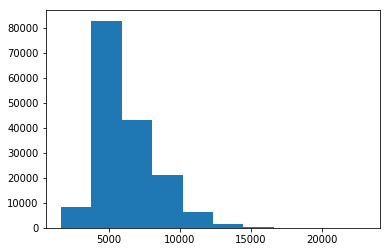

In [30]:
plt.hist(user["predict_income"])

In [31]:
user["predict_income"].max()

23044.6

In [33]:
m = [0,5000,8000,9000,12000,18000,25000]
user["predict_income"] =pd.cut(user.predict_income,m,labels=[1,2,3,4,5,6])

In [34]:
user.head(4)

,user_id,pred_gender,predict_income,province_id,age,stage
0,48100333,M,3,19,[35_39],1_6_4_2
1,111725039,F,2,6,[25_29],1_6_4
2,124649973,M,2,8,[30_34],1_4_8_5_2
3,127725416,F,4,25,[30_34],1_4_5_2


In [37]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163897 entries, 0 to 163896
Data columns (total 6 columns):
user_id           163897 non-null int64
pred_gender       163897 non-null object
predict_income    163897 non-null category
province_id       163897 non-null int64
age               163897 non-null object
stage             163897 non-null object
dtypes: category(1), int64(2), object(3)
memory usage: 6.4+ MB


In [48]:
user["stage"] = user["stage"].apply(lambda x : max(list(map(int,x.split("_"))) ))

In [45]:
x = "1_4_8_5_2_10"

In [46]:
max(x.split("_"))

'8'

In [47]:
max(list(map(int,x.split("_"))) )

10

In [49]:
user.head(2)

,user_id,pred_gender,predict_income,province_id,age,stage
0,48100333,M,3,19,[35_39],6
1,111725039,F,2,6,[25_29],6
